# A1

Coefficient (Slope): 98.5982192151453
Intercept: -738.036704195749


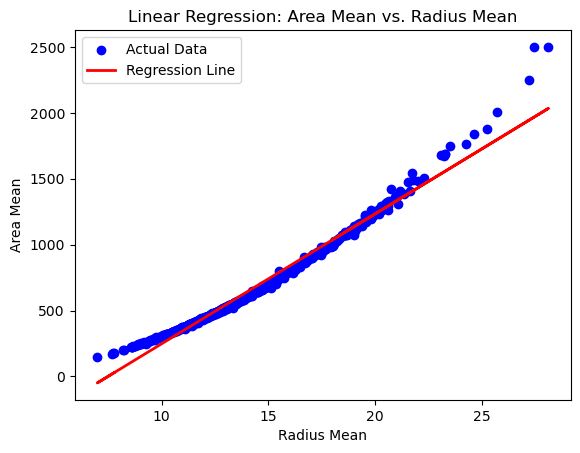

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\prava\\Downloads\\Sadhuko\\SEM5\\ML\\data.csv"
data = pd.read_csv(file_path)

# Selecting the feature and target variable
X_train = data[['radius_mean']]  # Predictor
y_train = data['area_mean']      # Target

# Creating and training the Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

# Making predictions
y_train_pred = reg.predict(X_train)

# Display the coefficients
coef, intercept = reg.coef_[0], reg.intercept_
print(f"Coefficient (Slope): {coef}")
print(f"Intercept: {intercept}")

# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Linear Regression: Area Mean vs. Radius Mean')
plt.legend()
plt.show()


# A2

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "C:\\Users\\prava\\Downloads\\Sadhuko\\SEM5\\ML\\data.csv"
data = pd.read_csv(file_path)

# Data Preparation: Select numerical columns and drop missing values
data = data[['radius_mean', 'area_mean']].dropna()

# Split the dataset into training and testing sets
X = data[['radius_mean']]
y = data['area_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train Set: MSE = {mse_train}, RMSE = {rmse_train}, MAPE = {mape_train}, R2 = {r2_train}")
print(f"Test Set: MSE = {mse_test}, RMSE = {rmse_test}, MAPE = {mape_test}, R2 = {r2_test}")


Train Set: MSE = 3344.1844153180464, RMSE = 57.82892369150619, MAPE = 0.07647984727112656, R2 = 0.9733971556797255
Test Set: MSE = 2169.4703637097023, RMSE = 46.5775736133786, MAPE = 0.07667335208712929, R2 = 0.9811859948447595


# A3

In [17]:
# Select multiple attributes for features (X) and the target variable (y)
X = data.drop(columns=['id', 'diagnosis', 'area_mean', 'Unnamed: 32'], errors='ignore')  # Exclude ID and non-numeric columns
y = data['area_mean']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model with multiple features
reg_multi = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred_multi = reg_multi.predict(X_train)
y_test_pred_multi = reg_multi.predict(X_test)

# Calculate metrics for training set
mse_train_multi = mean_squared_error(y_train, y_train_pred_multi)
rmse_train_multi = np.sqrt(mse_train_multi)
mape_train_multi = mean_absolute_percentage_error(y_train, y_train_pred_multi)
r2_train_multi = r2_score(y_train, y_train_pred_multi)

# Calculate metrics for test set
mse_test_multi = mean_squared_error(y_test, y_test_pred_multi)
rmse_test_multi = np.sqrt(mse_test_multi)
mape_test_multi = mean_absolute_percentage_error(y_test, y_test_pred_multi)
r2_test_multi = r2_score(y_test, y_test_pred_multi)

print(f"Train Set with Multiple Attributes: MSE = {mse_train_multi}, RMSE = {rmse_train_multi}, MAPE = {mape_train_multi}, R2 = {r2_train_multi}")
print(f"Test Set with Multiple Attributes: MSE = {mse_test_multi}, RMSE = {rmse_test_multi}, MAPE = {mape_test_multi}, R2 = {r2_test_multi}")


Train Set with Multiple Attributes: MSE = 3344.1844153180464, RMSE = 57.82892369150619, MAPE = 0.07647984727112656, R2 = 0.9733971556797255
Test Set with Multiple Attributes: MSE = 2169.4703637097023, RMSE = 46.5775736133786, MAPE = 0.07667335208712929, R2 = 0.9811859948447595


# A4

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from threadpoolctl import threadpool_limits

# Load the dataset
file_path = "C:\\Users\\prava\\Downloads\\Sadhuko\\SEM5\\ML\\data.csv"
data = pd.read_csv(file_path)

# Prepare data for clustering by dropping the target variable and non-numeric columns
X_cluster = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], errors='ignore')

# Limit the number of threads to 1
with threadpool_limits(limits=1):
    # K-means clustering with k = 2
    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_cluster)

    # Get the cluster labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

print(f"Cluster Labels: {labels}")
print(f"Cluster Centers: \n{centers}")


Cluster Labels: [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

# A5


In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate clustering evaluation metrics
silhouette = silhouette_score(X_cluster, kmeans.labels_)
ch_score = calinski_harabasz_score(X_cluster, kmeans.labels_)
db_index = davies_bouldin_score(X_cluster, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.6972646156059465
Calinski-Harabasz Score: 1300.2082268895422
Davies-Bouldin Index: 0.5044035685410988


# A6

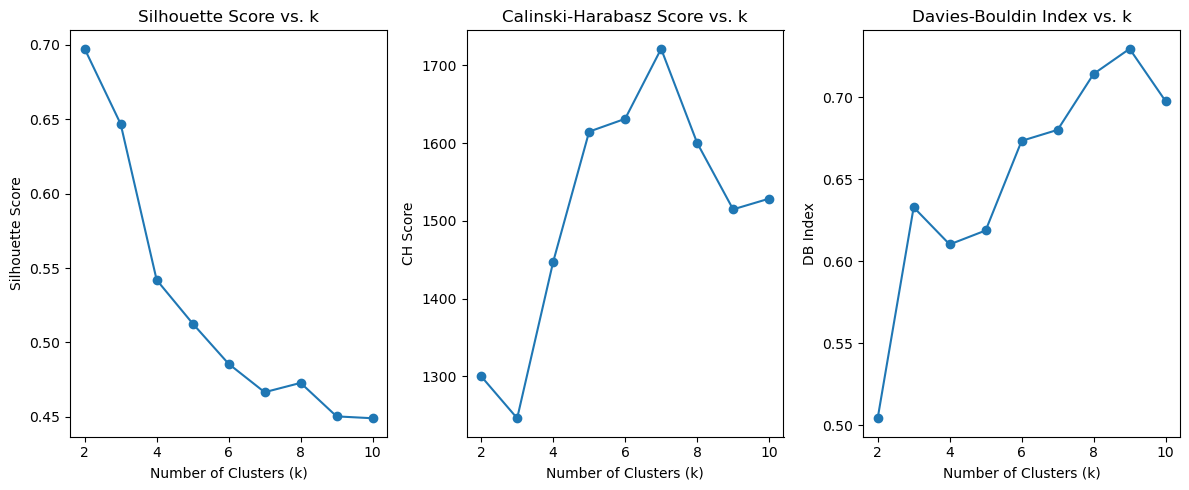

In [20]:
silhouette_scores = []
ch_scores = []
db_indices = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_cluster)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_cluster, kmeans.labels_))
    db_indices.append(davies_bouldin_score(X_cluster, kmeans.labels_))



# Plot the scores for each k
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_indices, marker='o')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()


# A7

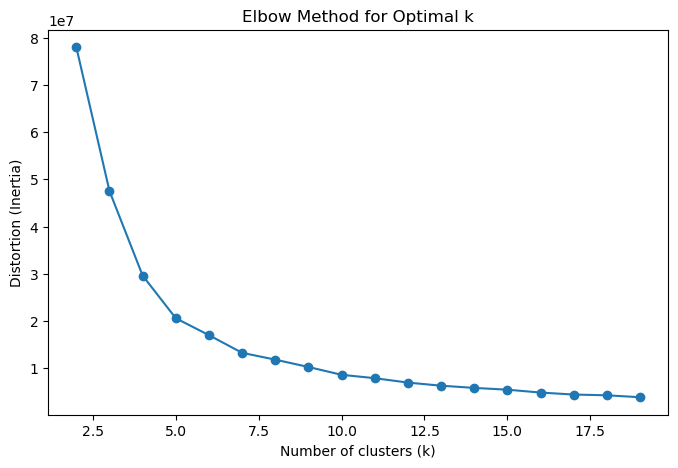

In [21]:
import warnings
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from threadpoolctl import threadpool_limits

# Suppress specific warning for KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Load the dataset
file_path = "C:\\Users\\prava\\Downloads\\Sadhuko\\SEM5\\ML\\data.csv"
data = pd.read_csv(file_path)

# Prepare data for clustering by dropping the target variable and non-numeric columns
X_cluster = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], errors='ignore')

# Elbow method to find the optimal number of clusters
distortions = []
k_range = range(2, 20)  # Range of k values to try

with threadpool_limits(limits=1):  # Limit number of threads to 1
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_cluster)
        distortions.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plotting the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()
